In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
np.random.seed(1000)

In [2]:
import pandas as pd

file_paths = [
    "S11_parameter_data_for_zero_orientation.txt",
    "S12_parameter_data_for_zero_orientation.txt",
    "S21_parameter_data_for_zero_orientation.txt",
    "S22_parameter_data_for_zero_orientation.txt"
]

datasets = []

# Read data from each file path
for file_path in file_paths:
    current_dataset = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{")+1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
    if current_dataset:
        datasets.append(current_dataset)

# Combine all datasets into a single DataFrame
combined_data = []
for dataset in datasets:
    permittivity_values = dataset[0]
    df_data = dataset[1:]
    df = pd.DataFrame(df_data, columns=["Frequency", "Real", "Imaginary"])
    for key, value in permittivity_values.items():
        if "er1" in key or "er11" in key:
            df[key] = value
    combined_data.append(df)

# Concatenate all DataFrames into a single DataFrame
final_dataset = pd.concat(combined_data, ignore_index=True)

# Print the combined DataFrame
print(final_dataset)


              Frequency               Real             Imaginary   
0       1.0000000000000  0.010708443820477   -0.0015462124720216  \
1       1.0006999969482  0.010755277238786   -0.0017734571592882   
2       1.0013999938965  0.010795198380947   -0.0020041132811457   
3       1.0020999908447  0.010827971622348   -0.0022378272842616   
4       1.0027999877930  0.010853389278054   -0.0024742297828197   
...                 ...                ...                   ...   
400395  1.6971999406815  0.030880561098456  -0.00067040085559711   
400396  1.6979000568390  0.030981497839093  -0.00094671209808439   
400397  1.6986000537872  0.031080238521099   -0.0012239875504747   
400398  1.6993000507355  0.031176701188087   -0.0015022689476609   
400399  1.7000000476837  0.031270798295736   -0.0017815737519413   

                    er1               er11  
0       2.2609046534204   0.04505415985025  
1       2.2609046534204   0.04505415985025  
2       2.2609046534204   0.04505415985025  
3  

In [3]:
final_dataset.columns = ['frequency','s_real','s_imaginary','permittivity_real','permittivity_imaginary']

In [4]:
print(final_dataset.head(20))

          frequency             s_real          s_imaginary permittivity_real   
0   1.0000000000000  0.010708443820477  -0.0015462124720216   2.2609046534204  \
1   1.0006999969482  0.010755277238786  -0.0017734571592882   2.2609046534204   
2   1.0013999938965  0.010795198380947  -0.0020041132811457   2.2609046534204   
3   1.0020999908447  0.010827971622348  -0.0022378272842616   2.2609046534204   
4   1.0027999877930  0.010853389278054  -0.0024742297828197   2.2609046534204   
5   1.0034999847412  0.010871269740164  -0.0027129407972097   2.2609046534204   
6   1.0041999816895  0.010881460271776  -0.0029535701032728   2.2609046534204   
7   1.0048999786377  0.010883836075664  -0.0031957186292857   2.2609046534204   
8   1.0055999755859  0.010878301225603  -0.0034389849752188   2.2609046534204   
9   1.0062999725342  0.010864786803722  -0.0036829612217844   2.2609046534204   
10  1.0069999694824  0.010843253694475  -0.0039272396825254   2.2609046534204   
11  1.0076999664307  0.01081

In [5]:
final_dataset.columns

Index(['frequency', 's_real', 's_imaginary', 'permittivity_real',
       'permittivity_imaginary'],
      dtype='object')

In [6]:
plt.hist(final_dataset['s_real'], bins=20, edgecolor='black')

(array([17621., 17617., 17625., 17610., 17612., 20475., 25556., 26271.,
        26726., 25861., 25735., 20921., 17615., 17595., 17596., 17607.,
        17595., 17592., 17588., 17582.]),
 array([     0.  ,  17580.55,  35161.1 ,  52741.65,  70322.2 ,  87902.75,
        105483.3 , 123063.85, 140644.4 , 158224.95, 175805.5 , 193386.05,
        210966.6 , 228547.15, 246127.7 , 263708.25, 281288.8 , 298869.35,
        316449.9 , 334030.45, 351611.  ]),
 <BarContainer object of 20 artists>)

In [ ]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(final_dataset.columns):
    plt.subplot(2, 2, i+1)
    plt.hist(final_dataset[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

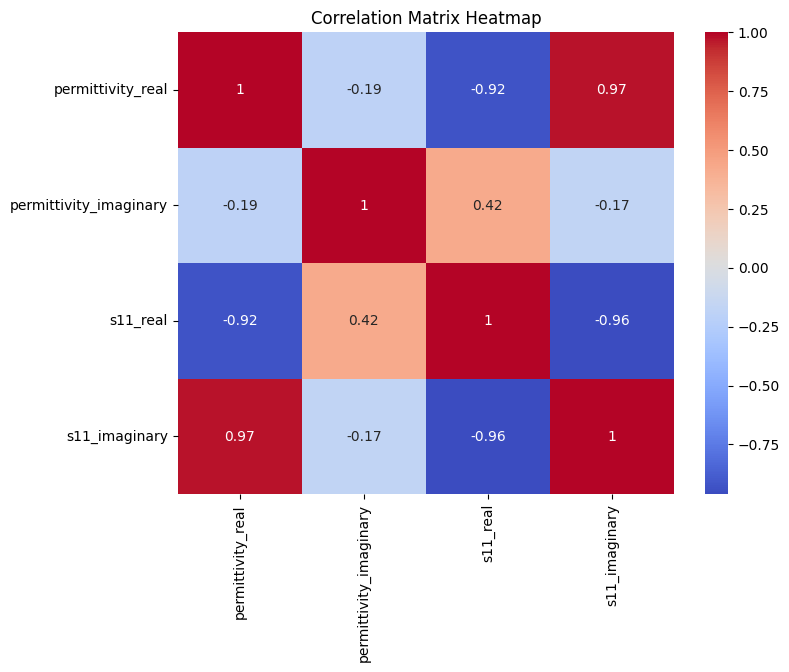

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['permittivity_real','permittivity_imaginary','s11_real','s11_imaginary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()